In [5]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
!apt install chromium-chromedriver
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
import pandas as pd

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 31 not upgraded.
Need to get 26.4 MB of archives.
After this operation, 116 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.3 [595 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1:4.5-3

In [12]:
#Scraping data from Amazon
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()

    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"

    return available

In [10]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=playstation+4&ref=nb_sb_noss_2"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))


    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [11]:
amazon_df

,title,price,rating,reviews,availability
0,Sony Playstation PS4 1TB Black Console,,4.6 out of 5 stars,"1,363 ratings",In Stock
1,PlayStation®4 Console – Call of Duty® Modern W...,,4.5 out of 5 stars,42 ratings,In Stock
2,Flagship Newest Play Station 4 1TB HDD Only on...,,4.6 out of 5 stars,195 ratings,Not Available
3,RPlay Play-Station 4 PS4 1TB Slim Edition Jet ...,,3.9 out of 5 stars,35 ratings,Only 1 left in stock - order soon.
4,Sony PlayStation 4 Pro 1TB Console - Black (PS...,,4.5 out of 5 stars,"4,207 ratings",Only 7 left in stock - order soon.
5,"Playstation Sony 4, 500GB Slim System [CUH-221...",,4.5 out of 5 stars,337 ratings,Not Available
6,Newest Sony Playstation 4 Slim 1TB SSD Console...,,4.5 out of 5 stars,305 ratings,
7,PlayStation 4 Slim 1TB Console - Marvel's Spid...,,4.7 out of 5 stars,"2,813 ratings",Only 3 left in stock - order soon.
8,PlayStation 4 1TB Console - Call of Duty: Blac...,,4.6 out of 5 stars,893 ratings,Only 3 left in stock - order soon.
9,Sony PlayStation 4 500GB Console - Uncharted 4...,,5.0 out of 5 stars,,Only 1 left in stock - order soon.


In [14]:
print(amazon_df.columns)

Index(['title', 'price', 'rating', 'reviews', 'availability'], dtype='object')


In [18]:
#Clustering based on Text Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize text descriptions
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(amazon_df['title'])

# Perform clustering
kmeans = KMeans(n_clusters=5)  # Number of clusters can be adjusted
text_clusters = kmeans.fit_predict(text_features)

# Add cluster labels to DataFrame
amazon_df['text_cluster'] = text_clusters

# Print cluster labels
print(amazon_df[['title', 'text_cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                title  text_cluster
0              Sony Playstation PS4 1TB Black Console             0
1   PlayStation®4 Console – Call of Duty® Modern W...             4
2   Flagship Newest Play Station 4 1TB HDD Only on...             2
3   RPlay Play-Station 4 PS4 1TB Slim Edition Jet ...             2
4   Sony PlayStation 4 Pro 1TB Console - Black (PS...             0
5   Playstation Sony 4, 500GB Slim System [CUH-221...             3
6   Newest Sony Playstation 4 Slim 1TB SSD Console...             1
7   PlayStation 4 Slim 1TB Console - Marvel's Spid...             1
8   PlayStation 4 1TB Console - Call of Duty: Blac...             4
9   Sony PlayStation 4 500GB Console - Uncharted 4...             3
10  MOVONE Wireless Controller Dual Vibration Game...             2
11  PlayStation 4 Slim 1TB Limited Edition Console...             4
12    PlayStation 4 Slim 500GB Console [Discontinued]             3
13  PlayStation 5 Console -  Marvel’s Spider-Man

   text_cluster  count  price  rating  reviews
0             0      3    NaN     NaN      NaN
1             1      3    NaN     NaN      NaN
2             2      4    NaN     NaN      NaN
3             3      3    NaN     NaN      NaN
4             4      3    NaN     NaN      NaN


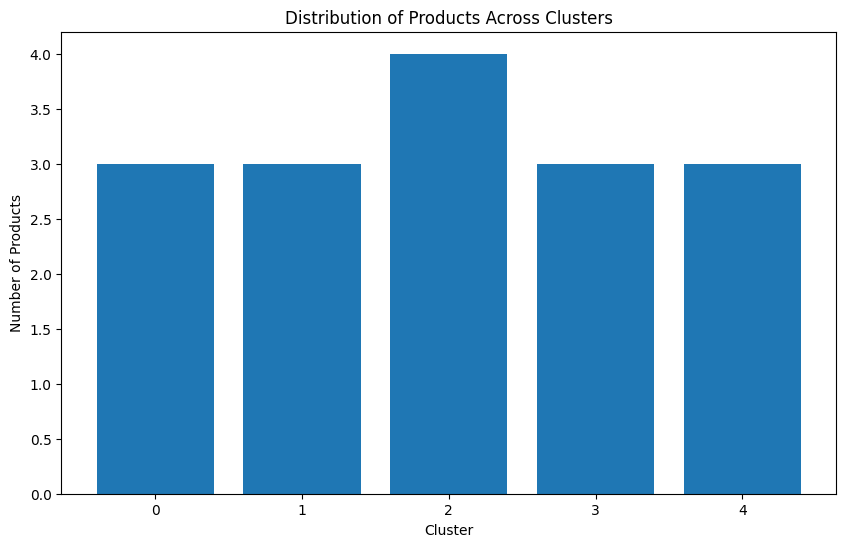

In [20]:
# Convert 'price', 'rating', and 'reviews' columns to numeric
amazon_df['price'] = pd.to_numeric(amazon_df['price'], errors='coerce')
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
amazon_df['reviews'] = pd.to_numeric(amazon_df['reviews'], errors='coerce')

# Analyze cluster characteristics
cluster_stats = amazon_df.groupby('text_cluster').agg({
    'title': 'count',
    'price': 'mean',
    'rating': 'mean',
    'reviews': 'mean'
}).rename(columns={'title': 'count'}).reset_index()

print(cluster_stats)

# Visualize cluster distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(cluster_stats['text_cluster'], cluster_stats['count'])
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Clusters')
plt.show()